<a href="https://colab.research.google.com/github/visiont3lab/data-visualization/blob/master/courses/02_Pandas/Pandas_Esercizio_Soluzione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descrizione

Datasets:
* dati_province = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
* dati_regioni = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
* dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

Obbiettivo: Utilizzando i dati provinciali analizzare l'andamento dei contagiati nella propria provincia nel tempo.

1. Plottare l'andamento nel tempo dei contagiati della propria provincia. 
2. Comparare l'andamento nel tempo dei contagiati delle prime 3 provincie della nostra regione (Emilia-Romagna) con quelli  di una provincia appartenente sempre alla nostra regione.
3. Creare un grafico a torta con le percentuali di contagiati per ogni provincia apparente alla nostra regione (Emilia-Romagna) 

## Importare Librerie

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import os
directory = "assets/images/"
if not os.path.exists(directory):
    os.makedirs(directory)

## Parte 1

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


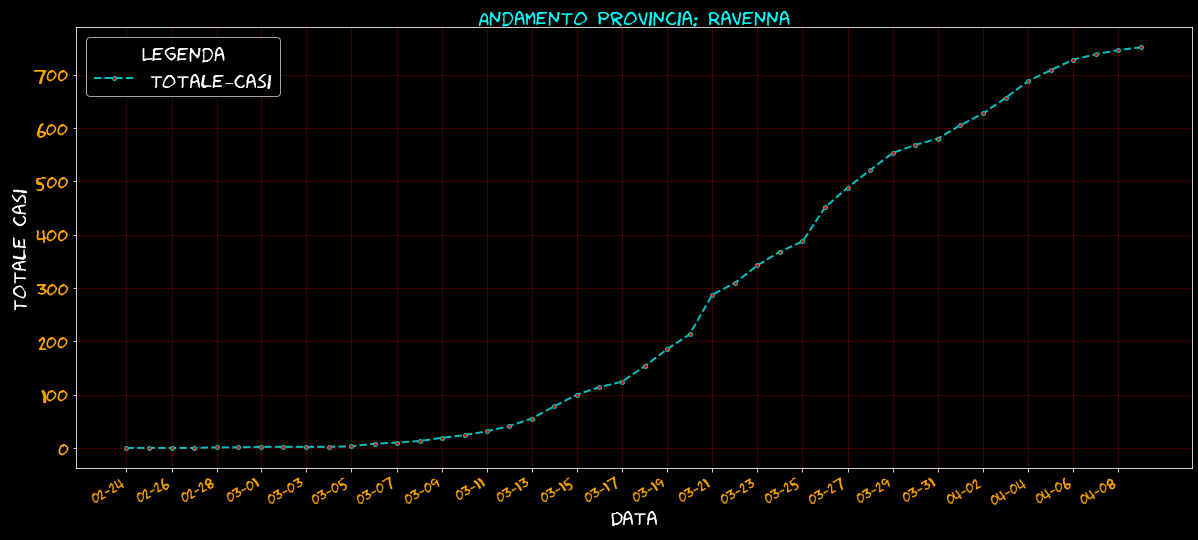

In [2]:
def plot_andamento_provincia_style(df,provincia):
    df_new = df[df["denominazione_provincia"]==provincia]
    #display(df_new.head())
    #display(df_new.info())
    #plt.style.use("dark_background")
    lista = list(df_new["data"])
    new_lista = []
    for i in range(0,len(lista),2):
        new_lista.append(lista[i])
    with plt.style.context("dark_background"):
        
        plt.rc("lines", linewidth=2, markersize=4, markerfacecolor="red")
        #plt.rcParams['lines.linewidth']=10
        #plt.rcParams['lines.markersize']=10
        #plt.rcParams['lines.markerfacecolor'] ="red"
        #plt.rcParams['axes.prop_cycle'] = cycler(color=['y']) # color line
        plt.rc("grid", color="red",alpha=0.3)
        plt.rc("axes",titlesize=20, titlecolor="cyan")
        plt.rc("font", family="fantasy", fantasy="Comic Neue", size=20)
        plt.rcParams["date.autoformatter.day"]="%m-%d"
        
        #plt.rcParams["date.autoformatter.day"]= "%m-%d" #"%Y-%m"
        ax = df_new.plot(kind="line", x="data", y="totale_casi", title="Andamento Provincia: " + provincia , grid=True, figsize=(20,9), style="o--c", xticks=new_lista)

        ax.set_xlabel("Data")
        ax.set_ylabel("Totale casi")
        ax.tick_params(axis="y",labelcolor="orange")
        ax.tick_params(axis="x",labelcolor="orange", labelsize=15)
        ax.legend(loc="best",title="Legenda")
        ax.figure.savefig("assets/images/fig1.png", transparent=False)
        return ax.figure

df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
provincia = "Ravenna"
df["data"] = pd.to_datetime(df["data"])

# Esercizion 1)
fig1 = plot_andamento_provincia_style(df, provincia)

## Parte 2

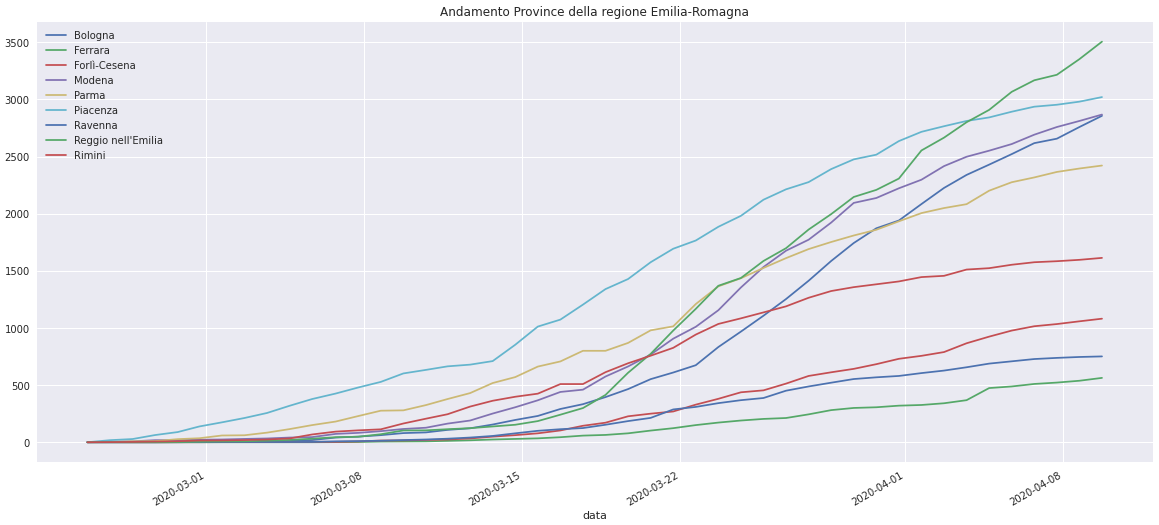

In [3]:
def get_nomi_regioni(df):
  return list(df["denominazione_regione"].unique())

def get_nomi_province(df,regione):
    a = df[df["denominazione_regione"]==regione]
    #ultima_data = list(a.tail(1)["data"])[0]
    ultima_data = a.tail(1)["data"].values[0]
    res = list(a[a["data"]==ultima_data]["denominazione_provincia"])
    res.remove('In fase di definizione/aggiornamento')
    return res

def get_andamento_province(df,regione):
    nomi_province = get_nomi_province(df, regione)
    my_dict={}
    my_dict["data"] = df["data"].unique()
    for nome in nomi_province:
        my_dict[nome] = list(df[df["denominazione_provincia"]==nome]["totale_casi"])

    df_new = pd.DataFrame(my_dict)
    #display(df_new.head())
    with plt.style.context("seaborn"):
        ax = df_new.plot(x="data", title="Andamento Province della regione " +regione, figsize=(20,9))
        ax.figure.savefig("assets/images/fig2.png", transparent=False)
    return ax.figure

# Esercizio 2)
regione="Emilia-Romagna"
fig2 = get_andamento_province(df,regione)


## Parte 3

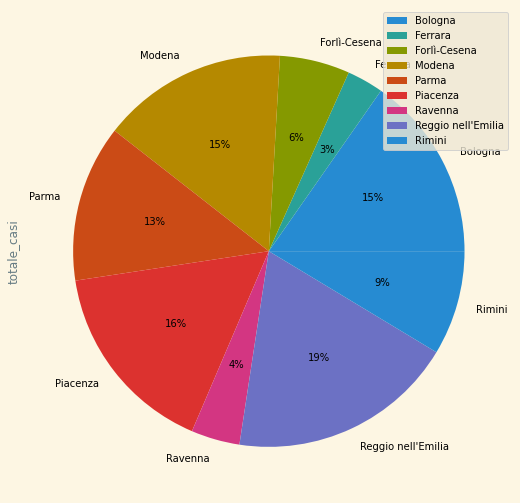

In [4]:
def pie_plot_province(df,regione):
    ultima_data = list(df.tail(1)["data"])[0]
    a =df[(df["denominazione_regione"]==regione) & (df["data"]==ultima_data) & (df["denominazione_provincia"]!="In fase di definizione/aggiornamento") ]
    with plt.style.context("Solarize_Light2"):
        ax = a.set_index("denominazione_provincia").plot(kind="pie", y="totale_casi",autopct='%1.0f%%', figsize=(20,9)) #, pctdistance=1.1, labeldistance=1.2)
        ax.figure.savefig("assets/images/fig3.png", transparent=False)
        return ax.figure

# Check style
# print(plt.style.available)
# Esercizio 3
fig3 = pie_plot_province(df, regione)

## Website development




In [5]:
!pip install dash flask_ngrok

In [6]:
%%writefile assets/typography.css
body {
    padding: 20px 300px 0px 300px;
    margin : 0px 0px 0px  0px;
    /*padding : 0px 0px 0px 0px;*/
    background-color: white;
}

Overwriting assets/typography.css


In [0]:
import dash
import dash_html_components as html
from flask_ngrok import run_with_ngrok

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server
run_with_ngrok(server) 

app.layout = html.Div([
        html.Div(
        [   
            html.Img(src='/assets/images/fig1.png'),
        ]),
        html.Div(
        [   
            html.Img(src='/assets/images/fig2.png'),
        ]),
        html.Div(
        [   
            html.Img(src='/assets/images/fig3.png'),
        ])
    ],style={'backgroundColor': "rgb(255,255,255)",  "margin": "0", "padding": "0"})

if __name__ == '__main__':
    server.run()
    #app.run_server() #debug=True, host="0.0.0.0", port=8900)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b6f41719.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [09/Apr/2020 19:21:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:09] "GET /_dash-component-suites/dash_renderer/react@16.v1_3_0m1586459997.13.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:09] "GET /assets/typography.css?m=1586460056.4910946 HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:09] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_3_0m1586459997.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:10] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_3_0m1586459997.13.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:10] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_3_0m1586459997.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:10] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_0_3m1586459999.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:21:10] "GET /_dash-component-suites/dash_renderer/dash_renderer.v1_3_0m1586459997.min.js HTTP/1.1" 200 -
127.0